# Redes libres de escala

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import sys
import queue
print ("- Diseñado en python 3")
print ("- No testeado para python 2")
print ("- Kernel en ejecución: \npython " + sys.version)

- Diseñado en python 3
- No testeado para python 2
- Kernel en ejecución: 
python 3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  2 2016, 17:53:06) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


## Funciones de otras practicas importadas como una librería

In [2]:
import lib_grafos as lg
%load_ext autoreload
file = open('funciones_lib_grafos.txt', 'r')
print(file.read())

def grafo_aleatorio(num_nodos, prob):
def tam_grafo(grafo):
def aleatorio(num_nodos, prob):
def indiceCluster_caminoCar(grafo):
def aleatiorio2(num_nodos, prob):
def calcula_C(grafo):
def calcula_L(grafo):
def calcula_grados(grafo):
def adyacentes(grafo, vertice):
def matrix_to_adyacent(grafo):
def calcula_grados_rapido(grafo, limit):
def get_distro(grados, tam_grafo):
def busqueda_anchura(grafo, nodo_ini=0):
def componentes_conexas(grafo):
def componentes_conexas_nodo(grafo, nodo, cola):
def aleatorio3(N, p):
def create_mundo_pequeno (num_nodos, k, probabilidad):
def mundo_pequeno (num_nodos, k, probabilidad):
def mundo_pequeno_print (num_nodos, k, probabilidad):



## Crear una red libre de escala

In [10]:
def libre_escala (num_inicial, num_final, num_ramas):
    
    #Hacemos la matriz del tamaño maximo y hacemos un grafo aleatorio para el tam inicial
    res = np.zeros(shape = (num_final, num_final))
    prob=.5
    for i in range(num_inicial):
        for j in range(num_inicial):
            if i>j and i!=j and rd.random()<=prob:
                    res[i][j]=1
                    res[j][i]=1
                    
    #Crecimiento
    for i in range(num_inicial, num_final):
        #Calculo de probabilidades
        grados = lg.calcula_grados_rapido(res, i)
        suma = sum(grados)
        grados = [x / suma for x in grados]
        #Numero de ramas
        for j in range(num_ramas):
            #Evitar añadir dos veces la misma
            encontrado=False
            while encontrado==False:
                #Calculo de la seleccionada
                aleat = rd.random()
                suma = grados[0]
                index=0
                while suma<aleat:
                    index=index+1
                    suma=suma+grados[index]
                #Actualizar matriz
                if res[i][index]==0:
                    res[i][index]=1
                    res[index][i]=1
                    encontrado=True
    return res

def libre_escala_print (num_inicial, num_final, num_ramas, l=True):
    print("!!!Calculando grafo libre de escala")
    res = libre_escala (num_inicial, num_final, num_ramas)
    
    print("!!!Calculando C")
    c, gg, N = lg.calcula_C(res)
    
    print("!!!Calculando grados")
    grados = lg.calcula_grados_rapido(res, num_final)
    
    if l==True:
        print("!!!Calculando L")
        L = lg.calcula_L(res)
    
    print("!!!Calculando distribucion")
    dist = lg.get_distro(grados, num_final)
    
    print("!!!Ploteando")
    print("==================\nTamaño grafo = "+str(num_final))
    if l==True:
        print("C = "+str(c)+"\nL = "+str(L))
    else:
        print("C = "+str(c))
        
    
    x=[]
    y=[]
    for i in range(len(dist)):
        if dist[i]!=0:
            x.append(i)
            y.append(dist[i])
        

    X = np.log(x)
    Y = np.log(y)   
    plt.plot(X, Y, 'o')
    m,b = np.polyfit(X[0:len(x)/2], Y[0:len(x)/2], 1) 
    plt.plot(X, m*X+b)
    print("Pendiente recta regresion = "+str(m))
    plt.show()

!!!Calculando grafo libre de escala
!!!Calculando C
!!!Calculando grados
!!!Calculando L
!!!Calculando distribucion
!!!Ploteando
Tamaño grafo = 300
C = 0.0547155743876
L = 3.0637012263099233
Pendiente recta regresion = -2.53580509004


/home/manur/anaconda2/envs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:73: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


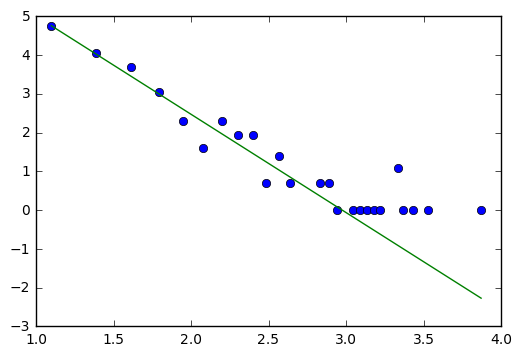

In [11]:
libre_escala_print(10, 300, 3)

!!!Calculando grafo libre de escala
!!!Calculando C
!!!Calculando grados
!!!Calculando L
!!!Calculando distribucion
!!!Ploteando
Tamaño grafo = 800
C = 0.0532439800855
L = 3.067393617021277
Pendiente recta regresion = -2.93756827033


/home/manur/anaconda2/envs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:73: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


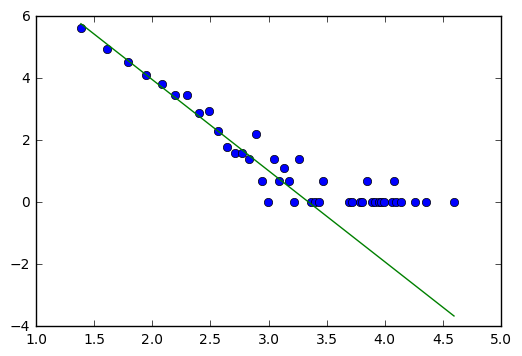

In [12]:
libre_escala_print(20, 800, 4)

!!!Calculando grafo libre de escala
!!!Calculando C
!!!Calculando grados
!!!Calculando distribucion
!!!Ploteando
Tamaño grafo = 2000
C = 0.0421522948775
Pendiente recta regresion = -3.2091639313


/home/manur/anaconda2/envs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:73: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


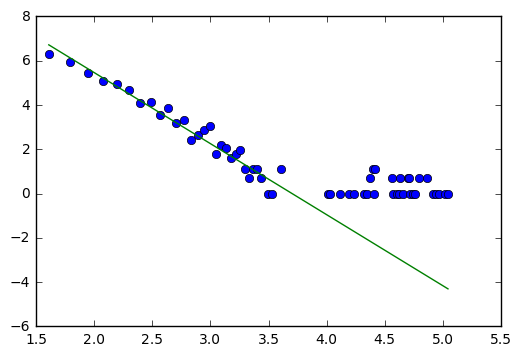

In [13]:
libre_escala_print(40, 2000, 5, False)

!!!Calculando grafo libre de escala
!!!Calculando C
!!!Calculando grados
!!!Calculando distribucion
!!!Ploteando
Tamaño grafo = 8000
C = 0.0502540228808
Pendiente recta regresion = -1.63246190003


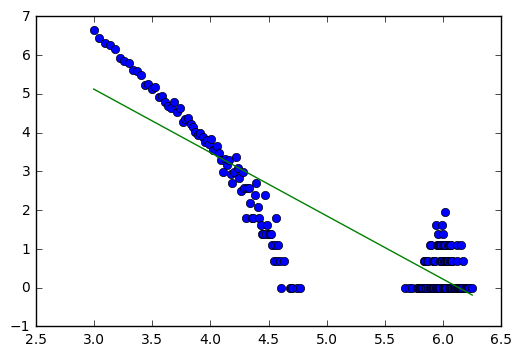

In [9]:
libre_escala_print(200, 8000, 20, False) #Recta hecha sobre todos los datos, no tener en cuenta

!!!Calculando grafo libre de escala
!!!Calculando C
!!!Calculando grados
!!!Calculando distribucion
!!!Ploteando
Tamaño grafo = 10000
C = 0.00522407308416
Pendiente recta regresion = -2.82023192618


/home/manur/anaconda2/envs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:73: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


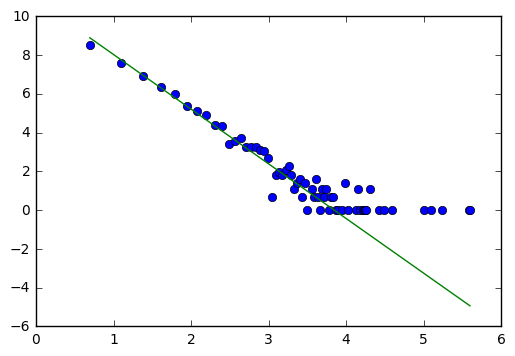

In [14]:
libre_escala_print(10, 10000, 2, False)

## Conclusiones

Como conclusiones cabe destacar que se ha conseguido obtener los parámetros esperados para una red libre de escala.

El índice de clusterización de estas redes es muy bajo (<0.1) mientras que el camino característico es también pequeño. Por ejemplo para una red de 800 nodos se ha obtenido C = 0.053 y L = 3.07.

Por otro lado al representar la distribución de los grados de los nodos en ejes logarítmicos se obtiene una recta de pendiente aproximada de -3